# Projekt na zaliczenie przedmiotu Programowanie w języku Python
## autor: Daniel Kacprzak
Warszawa 2023

## Zadanie
Przy użyciu narzędzi Pandas, Numpy, Matplotlib oraz Seaborn w języku Python, zostanie przeprowadzona analiza ludności w Polsce w miastach na prawach powiatów w latach 2011, 2016 i 2021.

Import narzędzi Pandas, Numpy, Matplotlib oraz Seaborn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Import oraz wyświetlenie danych

In [2]:
miasta=pd.read_csv('ludnosc_miasta.csv')

In [3]:
miasta

,Kod,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
0,261011,Jelenia Góra,83463.0,80524,76570
1,262011,Legnica,102979.0,100718,93988
2,264011,Wrocław,631235.0,637683,674312
3,265011,Wałbrzych od 2013,NaN,114568,103263
4,461011,Bydgoszcz,363020.0,353938,334026
...,...,...,...,...,...
61,3063011,Leszno,64713.0,64159,61396
62,3064011,Poznań,553564.0,540372,545073
63,3261011,Koszalin,109233.0,107680,104891
64,3262011,Szczecin,409596.0,404878,394482


In [4]:
miasta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kod               66 non-null     int64  
 1   Nazwa_miasta      66 non-null     object 
 2   liczba_osob_2011  65 non-null     float64
 3   liczba_osob_2016  66 non-null     int64  
 4   liczba_osob_2021  66 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.7+ KB


Na podstawie informacji o zbiorze danych, należy zrobić następujące kroki, by przygotować zbiór danych do dalszej analizy:
1. Usunięcie niepotrzebnych do dalszej analizy kolumn: kolumna 1 (Kod);
2. Poprawienie, rekordu z miastem Wałbrzych: zmiana nazwy oraz dodanie z liczbą mieszakańców w 2011 roku;
3. Zmiana kolumny Nazwa_miasta na indeks - czyli nazwa wiersza
4. Zmiana typu danych z float na integer dla kolumny liczba_osob_2011

Krok 1

In [5]:
miasta=miasta.drop('Kod',axis=1, )

In [6]:
miasta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nazwa_miasta      66 non-null     object 
 1   liczba_osob_2011  65 non-null     float64
 2   liczba_osob_2016  66 non-null     int64  
 3   liczba_osob_2021  66 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.2+ KB


In [7]:
miasta

,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
0,Jelenia Góra,83463.0,80524,76570
1,Legnica,102979.0,100718,93988
2,Wrocław,631235.0,637683,674312
3,Wałbrzych od 2013,NaN,114568,103263
4,Bydgoszcz,363020.0,353938,334026
...,...,...,...,...
61,Leszno,64713.0,64159,61396
62,Poznań,553564.0,540372,545073
63,Koszalin,109233.0,107680,104891
64,Szczecin,409596.0,404878,394482


Krok 2 - miasto Wałbrzych jest miastem na prawach powiatu, dopiero od 2013, stąd brak danych za 2011 rok w tabeli. Z bazy danych lokalnych GUS, wynika iż w 2011 roku Wałbrzych zamieszkiwało 119955 osób. Użyje fukcji Fillna oraz zastapię wyrażenie "Wałbrzych od 2013", na "Wałbrzych", używając funkcji replace

In [8]:
miasta['Nazwa_miasta'].replace('Wałbrzych od 2013','Wałbrzych',inplace=True)

In [9]:
miasta.fillna(value=119955, inplace=True)

In [10]:
miasta

,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
0,Jelenia Góra,83463.0,80524,76570
1,Legnica,102979.0,100718,93988
2,Wrocław,631235.0,637683,674312
3,Wałbrzych,119955.0,114568,103263
4,Bydgoszcz,363020.0,353938,334026
...,...,...,...,...
61,Leszno,64713.0,64159,61396
62,Poznań,553564.0,540372,545073
63,Koszalin,109233.0,107680,104891
64,Szczecin,409596.0,404878,394482


Krok 3

In [11]:
miasta.set_index('Nazwa_miasta', inplace=True)

In [12]:
miasta

,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
Nazwa_miasta,,,
Jelenia Góra,83463.0,80524,76570
Legnica,102979.0,100718,93988
Wrocław,631235.0,637683,674312
Wałbrzych,119955.0,114568,103263
Bydgoszcz,363020.0,353938,334026
...,...,...,...
Leszno,64713.0,64159,61396
Poznań,553564.0,540372,545073
Koszalin,109233.0,107680,104891


Krok 4

In [13]:
miasta.liczba_osob_2011 = miasta.liczba_osob_2011.astype('int64')

In [14]:
miasta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, Jelenia Góra to Świnoujście
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   liczba_osob_2011  66 non-null     int64
 1   liczba_osob_2016  66 non-null     int64
 2   liczba_osob_2021  66 non-null     int64
dtypes: int64(3)
memory usage: 2.1+ KB


In [15]:
miasta

,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
Nazwa_miasta,,,
Jelenia Góra,83463,80524,76570
Legnica,102979,100718,93988
Wrocław,631235,637683,674312
Wałbrzych,119955,114568,103263
Bydgoszcz,363020,353938,334026
...,...,...,...
Leszno,64713,64159,61396
Poznań,553564,540372,545073
Koszalin,109233,107680,104891


Tak przygotowana tabela z danymi jest gotowa do dalszej analizy. W następnej części zostaną wybrane miasta z liczbą mieszkańców od 0,5 do 1 miliona na koniec 2011 roku.

In [16]:
miasta = miasta[
        (miasta['liczba_osob_2011'] > 500000)
        & 
        (miasta['liczba_osob_2011'] < 1000000)
]

In [17]:
miasta

,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
Nazwa_miasta,,,
Wrocław,631235,637683,674312
Łódź,725055,696503,664860
Kraków,759137,765320,802583
Poznań,553564,540372,545073


Po sortowaniu można zauważyć, że wcześniej wspomniane dwa warunki spełniają tylko 4 miasta w Polsce. Następnie zostanie sprawdzone o ile procent wzrosła bądź spadła ilość mieszkańców pomiędzy:
* 2011, a 2016 rokiem;
* 2016, a 2021 rokiem;
* 2011, a 2021 rokiem.

In [18]:
miasta["procent wzrostu pomiędzy 2011-2016"] = (miasta["liczba_osob_2016"]-miasta["liczba_osob_2011"])/miasta["liczba_osob_2011"]
miasta["procent wzrostu pomiędzy 2016-2021"] = (miasta["liczba_osob_2021"]-miasta["liczba_osob_2016"])/miasta["liczba_osob_2016"]
miasta["procent wzrostu pomiędzy 2011-2021"] = (miasta["liczba_osob_2021"]-miasta["liczba_osob_2011"])/miasta["liczba_osob_2011"]
#zmiana na procenty
miasta.loc[:,"procent wzrostu pomiędzy 2011-2016",]=miasta["procent wzrostu pomiędzy 2011-2016"].map('{:.2%}'.format)
miasta.loc[:,"procent wzrostu pomiędzy 2016-2021",]=miasta["procent wzrostu pomiędzy 2016-2021"].map('{:.2%}'.format)
miasta.loc[:,"procent wzrostu pomiędzy 2011-2021",]=miasta["procent wzrostu pomiędzy 2011-2021"].map('{:.2%}'.format)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_6412\4119966668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miasta["procent wzrostu pomiędzy 2011-2016"] = (miasta["liczba_osob_2016"]-miasta["liczba_osob_2011"])/miasta["liczba_osob_2011"]
C:\Users\Daniel\AppData\Local\Temp\ipykernel_6412\4119966668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miasta["procent wzrostu pomiędzy 2016-2021"] = (miasta["liczba_osob_2021"]-miasta["liczba_osob_2016"])/miasta["liczba_osob_2016"]
C:\Users\Daniel\AppData\Lo

In [19]:
miasta

,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021,procent wzrostu pomiędzy 2011-2016,procent wzrostu pomiędzy 2016-2021,procent wzrostu pomiędzy 2011-2021
Nazwa_miasta,,,,,,
Wrocław,631235,637683,674312,1.02%,5.74%,6.82%
Łódź,725055,696503,664860,-3.94%,-4.54%,-8.30%
Kraków,759137,765320,802583,0.81%,4.87%,5.72%
Poznań,553564,540372,545073,-2.38%,0.87%,-1.53%


In [20]:
miasta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Wrocław to Poznań
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   liczba_osob_2011                    4 non-null      int64 
 1   liczba_osob_2016                    4 non-null      int64 
 2   liczba_osob_2021                    4 non-null      int64 
 3   procent wzrostu pomiędzy 2011-2016  4 non-null      object
 4   procent wzrostu pomiędzy 2016-2021  4 non-null      object
 5   procent wzrostu pomiędzy 2011-2021  4 non-null      object
dtypes: int64(3), object(3)
memory usage: 224.0+ bytes


Następnym krokiem do analizy danych, będzie stworzenie prostego wykresu liniowego, który przedstawi zmianę liczby ludności w czasie.

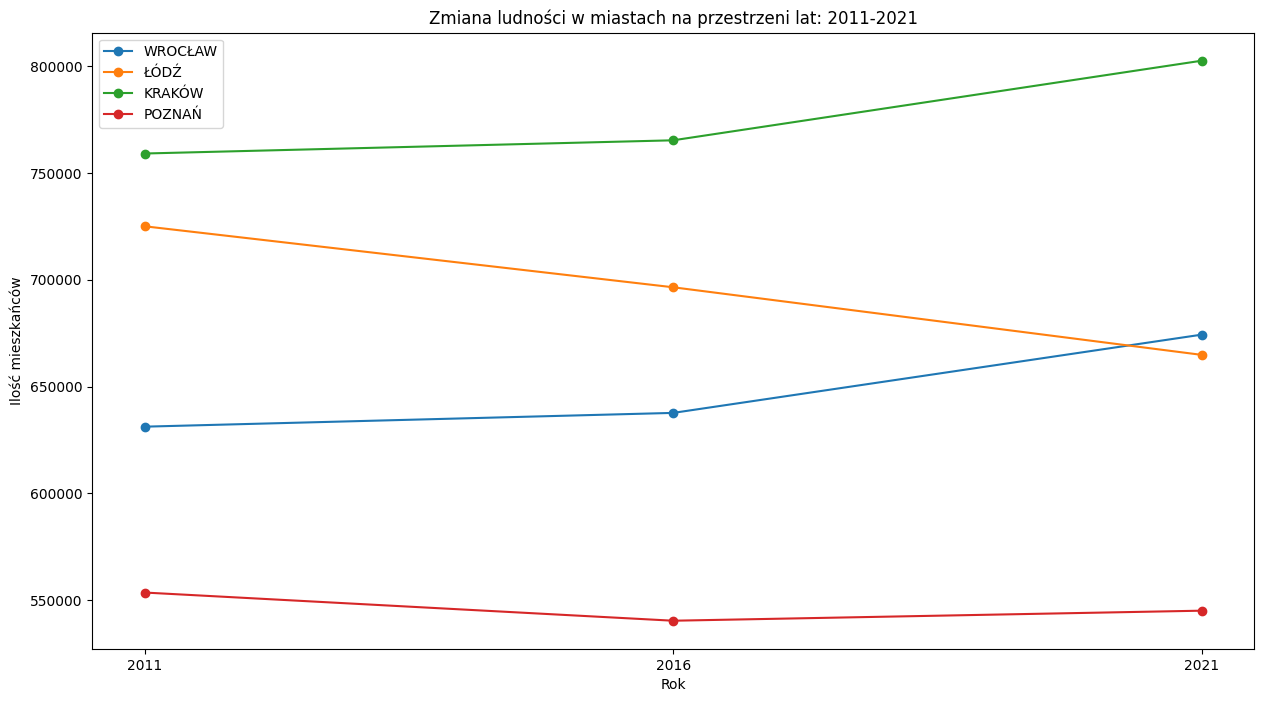

In [21]:
#Definiowanie danych
Lata = [2011, 2016, 2021]
Wrocław = [631235, 637683, 674312]
Łódź = [725055, 696503, 664860]
Kraków = [759137, 765320, 802583]
Poznań = [553564, 540372, 545073]

#Definiowanie Osi x, y, wielkości wykresu oraz oznaczeń linii
fig,ax=plt.subplots(figsize=(15,8))
plt.plot(Lata, Wrocław, marker="o",label='WROCŁAW')
plt.plot(Lata, Łódź, marker="o",label='ŁÓDŹ')
plt.plot(Lata, Kraków, marker="o",label='KRAKÓW')
plt.plot(Lata, Poznań, marker="o",label='POZNAŃ')

#Definiowanie tytułu wykresu, legendy oraz opisu osi 
plt.title("Zmiana ludności w miastach na przestrzeni lat: 2011-2021")
plt.xlabel("Rok")
plt.ylabel("Ilość mieszkańców")
plt.xticks([2011, 2016, 2021])
plt.legend()



Z wykresu widać można odczytać, że w podobnym tempie rosła liczba ludności w miastach: Kraków oraz Wrocław. Na drugim biegunie jest z kolei miasto Łódź, które w ciągu 10 lat straciło 8,3% populacji (dane z wcześniejszych obliczeń). Ciekawym przypadkiem jest miasto Poznań, gdzie pomiędzy latami 2011-2016 zauważyć można było tendencje spadkową (przyrost naturalny -2,38%). Natomiast w latach 2016-2021 tendencja zmieniła się w rosnącą (przyrost naturalny 0,87%).

Powyższy wykres, można rozbić na 4 mniejsze wykresy pokazujące zmiany w ilości mieszkańców dla poszczególnych miast oraz wykesportować do pliku graficznego

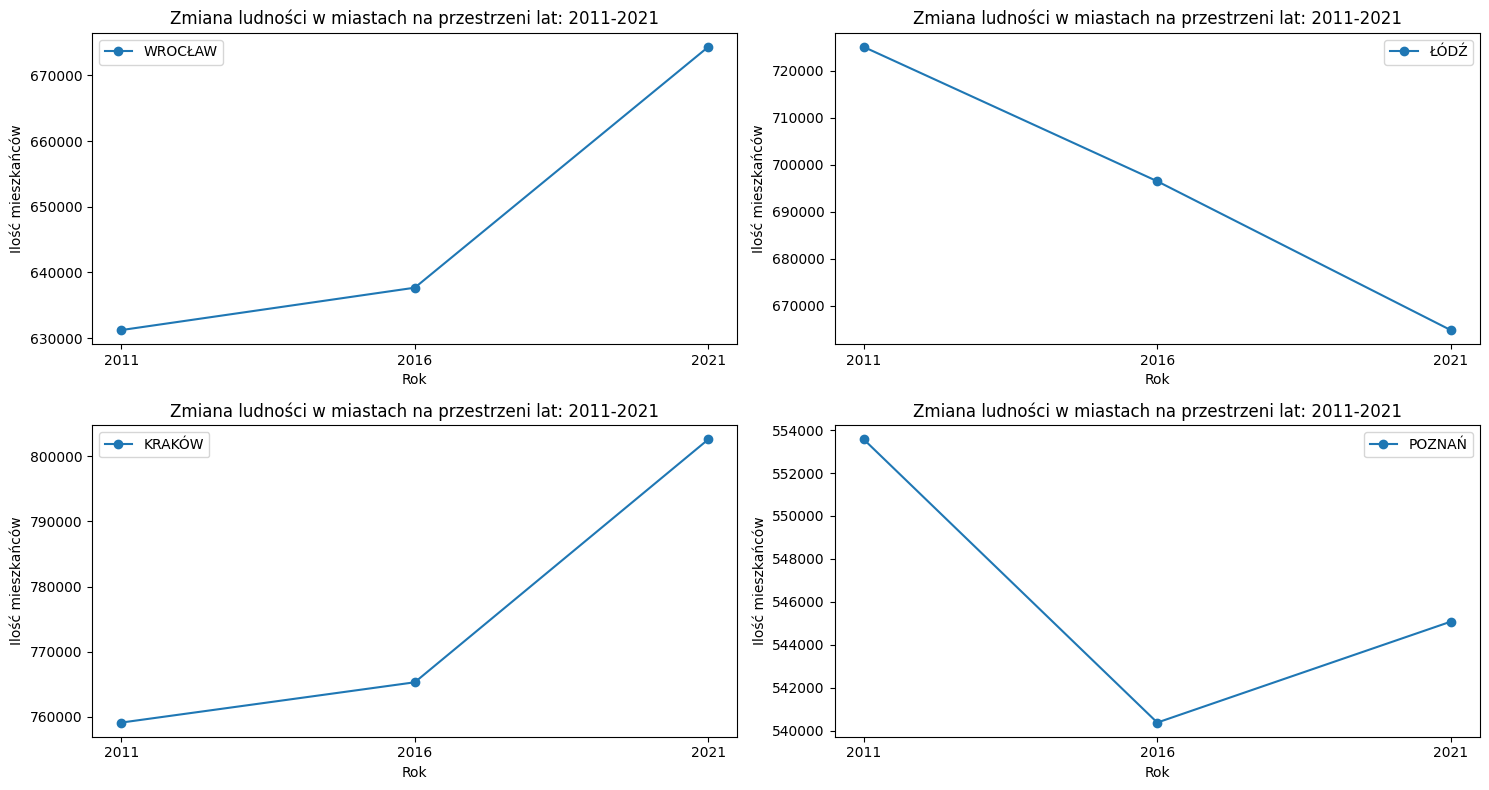

In [22]:
fig,ax=plt.subplots(2,2,figsize=(15,8))
ax[0,0].plot(Lata, Wrocław, marker="o",label='WROCŁAW')
ax[0,0].set_title("Zmiana ludności w miastach na przestrzeni lat: 2011-2021")
ax[0,0].set_xlabel("Rok")
ax[0,0].set_ylabel("Ilość mieszkańców")
ax[0,0].set_xticks([2011, 2016, 2021])
ax[0,0].legend()
ax[0,1].plot(Lata, Łódź, marker="o",label='ŁÓDŹ')
ax[0,1].set_title("Zmiana ludności w miastach na przestrzeni lat: 2011-2021")
ax[0,1].set_xlabel("Rok")
ax[0,1].set_ylabel("Ilość mieszkańców")
ax[0,1].set_xticks([2011, 2016, 2021])
ax[0,1].legend()
ax[1,0].plot(Lata, Kraków, marker="o",label='KRAKÓW')
ax[1,0].set_title("Zmiana ludności w miastach na przestrzeni lat: 2011-2021")
ax[1,0].set_xlabel("Rok")
ax[1,0].set_ylabel("Ilość mieszkańców")
ax[1,0].set_xticks([2011, 2016, 2021])
ax[1,0].legend()
ax[1,1].plot(Lata, Poznań, marker="o",label='POZNAŃ')
ax[1,1].set_title("Zmiana ludności w miastach na przestrzeni lat: 2011-2021")
ax[1,1].set_xlabel("Rok")
ax[1,1].set_ylabel("Ilość mieszkańców")
ax[1,1].set_xticks([2011, 2016, 2021])
ax[1,1].legend()

plt.tight_layout()
plt.savefig("wykresy.jpg")
plt.show()

W dalszej części projektu, zostanie przedstawiona analiza największej ilości rekordów z bazy danych miast powiatowych: miasta do 100 tys. mieszkańców. Na początek ponownie załodowane zostaną dane z pliku .csv

In [23]:
miasta=pd.read_csv('ludnosc_miasta.csv')

In [24]:
miasta

,Kod,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
0,261011,Jelenia Góra,83463.0,80524,76570
1,262011,Legnica,102979.0,100718,93988
2,264011,Wrocław,631235.0,637683,674312
3,265011,Wałbrzych od 2013,NaN,114568,103263
4,461011,Bydgoszcz,363020.0,353938,334026
...,...,...,...,...,...
61,3063011,Leszno,64713.0,64159,61396
62,3064011,Poznań,553564.0,540372,545073
63,3261011,Koszalin,109233.0,107680,104891
64,3262011,Szczecin,409596.0,404878,394482


Ponownie jak w pierwszej części projektu przejdziemy przez kroku przygotowujące dane z pliku, oprócz kroku 3 - Zmiana kolumny Nazwa_miasta na indeks - czyli nazwa wiersza

In [25]:
miasta=miasta.drop('Kod',axis=1, )
miasta['Nazwa_miasta'].replace('Wałbrzych od 2013','Wałbrzych',inplace=True)
miasta.fillna(value=119955, inplace=True)
miasta.liczba_osob_2011 = miasta.liczba_osob_2011.astype('int64')

In [26]:
miasta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nazwa_miasta      66 non-null     object
 1   liczba_osob_2011  66 non-null     int64 
 2   liczba_osob_2016  66 non-null     int64 
 3   liczba_osob_2021  66 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.2+ KB


In [27]:
miasta

,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
0,Jelenia Góra,83463,80524,76570
1,Legnica,102979,100718,93988
2,Wrocław,631235,637683,674312
3,Wałbrzych,119955,114568,103263
4,Bydgoszcz,363020,353938,334026
...,...,...,...,...
61,Leszno,64713,64159,61396
62,Poznań,553564,540372,545073
63,Koszalin,109233,107680,104891
64,Szczecin,409596,404878,394482


W następnym kroku zostaną wybrane miasta, których liczba mieszkańców na koniec 2021 roku była mniejsza bądź rózna 100 tys.

In [28]:
miasta = miasta[
        (miasta['liczba_osob_2021'] <= 100000)
]

In [29]:
miasta

,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
0,Jelenia Góra,83463,80524,76570
1,Legnica,102979,100718,93988
5,Grudziądz,98438,95964,90275
8,Biała Podlaska,58000,57303,55100
9,Chełm,66176,63734,58805
11,Zamość,65784,64648,59603
15,Piotrków Trybunalski,76505,74694,68270
16,Skierniewice,48658,48327,45933
18,Nowy Sącz,84325,83993,80979
20,Ostrołęka,53443,52337,49275


In [30]:
miasta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 65
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nazwa_miasta      29 non-null     object
 1   liczba_osob_2011  29 non-null     int64 
 2   liczba_osob_2016  29 non-null     int64 
 3   liczba_osob_2021  29 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


W zbiorze danych, występuje 29 miast. Warto zaobserwować, że dwa miasta: Kalisz i Legnica w 2011 oraz 2016 roku miały ilość mieszkańców większą niż 100 tys. osób. W dalszym etapie analizy, przy użyciu biblioteki Numpy, zostaną policzone podstawowe statystyki: średnia, mediana oraz odchylenie standardowe.

In [31]:
srednia = (np.mean(miasta['liczba_osob_2021']))
mediana = (np.median(miasta['liczba_osob_2021']))
odchylenie =(np.std(miasta['liczba_osob_2021']))

print(round(srednia, 2))
print(round(mediana,2))
print(round(odchylenie,2))

65016.17
61839.0
16880.54


Na podstawie średniej oraz odchylenia standardowego możemy policzyć typowy obszar zmienności Xtyp
* srednia - odchylenie (X1)
* srednia + odchylenie (X2)
* X1 < Xtyp < X2

Sprawdzone zostanie ile rekordów mieści się w Xtyp


In [32]:
X1 = srednia - odchylenie
X2 = srednia + odchylenie

print(round (X1, 0))
print(round (X2, 0))

48136.0
81897.0


In [33]:
miasta

,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
0,Jelenia Góra,83463,80524,76570
1,Legnica,102979,100718,93988
5,Grudziądz,98438,95964,90275
8,Biała Podlaska,58000,57303,55100
9,Chełm,66176,63734,58805
11,Zamość,65784,64648,59603
15,Piotrków Trybunalski,76505,74694,68270
16,Skierniewice,48658,48327,45933
18,Nowy Sącz,84325,83993,80979
20,Ostrołęka,53443,52337,49275


In [34]:
miasta = miasta[
        (miasta['liczba_osob_2021'] > X1)
        & 
        (miasta['liczba_osob_2021'] < X2)
]

In [35]:
miasta

,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
0,Jelenia Góra,83463,80524,76570
8,Biała Podlaska,58000,57303,55100
9,Chełm,66176,63734,58805
11,Zamość,65784,64648,59603
15,Piotrków Trybunalski,76505,74694,68270
18,Nowy Sącz,84325,83993,80979
20,Ostrołęka,53443,52337,49275
23,Siedlce,76480,77020,76005
27,Przemyśl,64728,62154,57568
31,Łomża,63070,62802,60468


In [36]:
miasta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 61
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nazwa_miasta      17 non-null     object
 1   liczba_osob_2011  17 non-null     int64 
 2   liczba_osob_2016  17 non-null     int64 
 3   liczba_osob_2021  17 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 680.0+ bytes


W tym przedziale: X1 < Xtyp < X2 mieści się 17 wyników z 29, czyli ok. 59 % miast ze zbioru miast poniżej 100 tys. mieszkańców są typowe dla tych danych. Pozostałe 12 miast znajdują się po za zakresem i uważa się je za odstające od danych.

W dalszej części projektu, zostanie przedstawiona analiza  rekordów z bazy danych miast powiatowych: miasta od 100 tys. do 500 tys. mieszkańców na koniec 2021 roku. Na początek ponownie załodowane zostaną dane z pliku .csv, oraz zostaną zrobione 4 kroki przygotowujące bazę danych, które były opisane w 1 części projektu - oprócz kroku 3 - Zmiana kolumny Nazwa_miasta na indeks - czyli nazwa wiersza

In [37]:
miasta=pd.read_csv('ludnosc_miasta.csv')

In [38]:
miasta

,Kod,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
0,261011,Jelenia Góra,83463.0,80524,76570
1,262011,Legnica,102979.0,100718,93988
2,264011,Wrocław,631235.0,637683,674312
3,265011,Wałbrzych od 2013,NaN,114568,103263
4,461011,Bydgoszcz,363020.0,353938,334026
...,...,...,...,...,...
61,3063011,Leszno,64713.0,64159,61396
62,3064011,Poznań,553564.0,540372,545073
63,3261011,Koszalin,109233.0,107680,104891
64,3262011,Szczecin,409596.0,404878,394482


In [39]:
miasta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kod               66 non-null     int64  
 1   Nazwa_miasta      66 non-null     object 
 2   liczba_osob_2011  65 non-null     float64
 3   liczba_osob_2016  66 non-null     int64  
 4   liczba_osob_2021  66 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.7+ KB


In [40]:
miasta=miasta.drop('Kod',axis=1, )
miasta['Nazwa_miasta'].replace('Wałbrzych od 2013','Wałbrzych',inplace=True)
miasta.fillna(value=119955, inplace=True)
miasta.liczba_osob_2011 = miasta.liczba_osob_2011.astype('int64')

In [41]:
miasta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nazwa_miasta      66 non-null     object
 1   liczba_osob_2011  66 non-null     int64 
 2   liczba_osob_2016  66 non-null     int64 
 3   liczba_osob_2021  66 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.2+ KB


In [42]:
miasta

,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
0,Jelenia Góra,83463,80524,76570
1,Legnica,102979,100718,93988
2,Wrocław,631235,637683,674312
3,Wałbrzych,119955,114568,103263
4,Bydgoszcz,363020,353938,334026
...,...,...,...,...
61,Leszno,64713,64159,61396
62,Poznań,553564,540372,545073
63,Koszalin,109233,107680,104891
64,Szczecin,409596,404878,394482


In [43]:
miasta = miasta[
                (miasta['liczba_osob_2021'] > 100000)
                &
                (miasta['liczba_osob_2021'] <= 500000)
                ]

In [44]:
miasta

,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
3,Wałbrzych,119955,114568,103263
4,Bydgoszcz,363020,353938,334026
6,Toruń,204921,202521,197112
7,Włocławek,116345,112483,103535
10,Lublin,348567,340466,332852
12,Gorzów Wielkopolski,124554,123995,118011
13,Zielona Góra,119197,139330,139667
19,Tarnów,113593,110110,105014
21,Płock,124318,121295,113660
22,Radom,220602,215020,199904


In [45]:
miasta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 3 to 64
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nazwa_miasta      32 non-null     object
 1   liczba_osob_2011  32 non-null     int64 
 2   liczba_osob_2016  32 non-null     int64 
 3   liczba_osob_2021  32 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


Jak widać z wejściowego zbioru, miast na prawach powiatu z liczbą mieszkańców pomiędzy 100, a 500 tys. mieszkańców jest najwięcej: bo aż 32. Z tego zbioru, zostanie wybranych do dalszej analizy 10 miast.

In [46]:
wybrane_miasta = ['Szczecin', 'Gdańsk', 'Gdynia', 'Płock', 'Radom', 'Lublin', 'Katowice', 'Opole', 'Tarnów', 'Rybnik']
miasta = miasta[miasta['Nazwa_miasta'].isin(wybrane_miasta)]

In [47]:
miasta

,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
10,Lublin,348567,340466,332852
19,Tarnów,113593,110110,105014
21,Płock,124318,121295,113660
22,Radom,220602,215020,199904
25,Opole,122439,118722,126775
33,Gdańsk,460517,463754,486271
34,Gdynia,248939,246991,244676
45,Katowice,309304,298111,282755
49,Rybnik,140944,139252,132923
64,Szczecin,409596,404878,394482


Poniżej zostawnie dodana kolumna Region, oraz przypisany region do każdego z miast. Następnie zostanie użyta biblioteka Seaborn, do wygenerowania wykresu.

In [48]:
miasta = miasta.assign(Region=['centralny', 'południowy', 'centralny', 'centralny', 'południowy', 'północny', 'północny', 'południowy', 'południowy', 'północny'])


In [49]:
miasta

,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021,Region
10,Lublin,348567,340466,332852,centralny
19,Tarnów,113593,110110,105014,południowy
21,Płock,124318,121295,113660,centralny
22,Radom,220602,215020,199904,centralny
25,Opole,122439,118722,126775,południowy
33,Gdańsk,460517,463754,486271,północny
34,Gdynia,248939,246991,244676,północny
45,Katowice,309304,298111,282755,południowy
49,Rybnik,140944,139252,132923,południowy
64,Szczecin,409596,404878,394482,północny


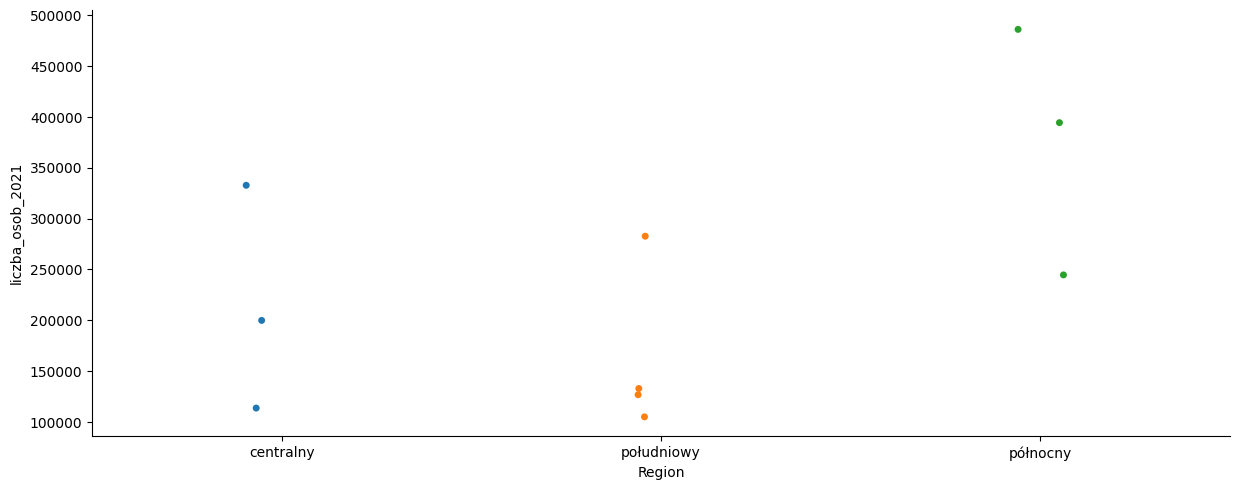

In [50]:
sns.catplot(x="Region",
            y="liczba_osob_2021",
            data=miasta,
            aspect=2.5)

Na koniec projektu, sprawdzę % oraz liczbowo przyrost w miastach na prawach powiatu i posortuje tabele wynikowe.

In [51]:
miasta=pd.read_csv('ludnosc_miasta.csv')
miasta=miasta.drop('Kod',axis=1, )
miasta['Nazwa_miasta'].replace('Wałbrzych od 2013','Wałbrzych',inplace=True)
miasta.fillna(value=119955, inplace=True)
miasta.liczba_osob_2011 = miasta.liczba_osob_2011.astype('int64')

In [52]:
miasta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nazwa_miasta      66 non-null     object
 1   liczba_osob_2011  66 non-null     int64 
 2   liczba_osob_2016  66 non-null     int64 
 3   liczba_osob_2021  66 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.2+ KB


In [53]:
miasta

,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021
0,Jelenia Góra,83463,80524,76570
1,Legnica,102979,100718,93988
2,Wrocław,631235,637683,674312
3,Wałbrzych,119955,114568,103263
4,Bydgoszcz,363020,353938,334026
...,...,...,...,...
61,Leszno,64713,64159,61396
62,Poznań,553564,540372,545073
63,Koszalin,109233,107680,104891
64,Szczecin,409596,404878,394482


Tworzenie kolumn z procentowym oraz liczbowym wzrostem liczby mieszkańcow pomiędzy 2011 oraz 2021 rokiem.

In [54]:
miasta["procent wzrostu pomiędzy 2011-2021"] = (miasta["liczba_osob_2021"]-miasta["liczba_osob_2011"])/miasta["liczba_osob_2011"]
miasta["procent wzrostu pomiędzy 2011-2021"] = miasta["procent wzrostu pomiędzy 2011-2021"].apply(lambda x: "{:.2f}%".format(x * 100))
miasta["liczbowy wzrost pomiędzy 2011-2021"] = (miasta["liczba_osob_2021"]-miasta["liczba_osob_2011"])

In [55]:
miasta
miasta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Nazwa_miasta                        66 non-null     object
 1   liczba_osob_2011                    66 non-null     int64 
 2   liczba_osob_2016                    66 non-null     int64 
 3   liczba_osob_2021                    66 non-null     int64 
 4   procent wzrostu pomiędzy 2011-2021  66 non-null     object
 5   liczbowy wzrost pomiędzy 2011-2021  66 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.2+ KB


Sortowanie od najmnniejszej wartości w kolumnie: "liczbowy wzrost pomiędzy 2011-2021"

In [56]:
miasta = miasta.sort_values("liczbowy wzrost pomiędzy 2011-2021")

In [57]:
miasta

,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021,procent wzrostu pomiędzy 2011-2021,liczbowy wzrost pomiędzy 2011-2021
14,Łódź,725055,696503,664860,-8.30%,-60195
4,Bydgoszcz,363020,353938,334026,-7.99%,-28994
45,Katowice,309304,298111,282755,-8.58%,-26549
40,Częstochowa,235798,226225,210773,-10.61%,-25025
38,Bytom,176106,169617,151691,-13.86%,-24415
...,...,...,...,...,...,...
13,Zielona Góra,119197,139330,139667,17.17%,20470
33,Gdańsk,460517,463754,486271,5.59%,25754
2,Wrocław,631235,637683,674312,6.82%,43077
17,Kraków,759137,765320,802583,5.72%,43446


Sortowanie od największej wartości w kolumnie: "liczbowy wzrost pomiędzy 2011-2021" oraz wyświetlenie całej tabeli

In [58]:
miasta = miasta.sort_values("liczbowy wzrost pomiędzy 2011-2021", ascending=False)

In [143]:
pd.options.display.max_rows = 100
miasta

,Nazwa_miasta,liczba_osob_2011,liczba_osob_2016,liczba_osob_2021,procent wzrostu pomiędzy 2011-2021,liczbowy wzrost pomiędzy 2011-2021
24,Powiat m. st. Warszawa,1708491,1753977,1863056,9.05%,154565
17,Kraków,759137,765320,802583,5.72%,43446
2,Wrocław,631235,637683,674312,6.82%,43077
33,Gdańsk,460517,463754,486271,5.59%,25754
13,Zielona Góra,119197,139330,139667,17.17%,20470
28,Rzeszów,180031,187422,196374,9.08%,16343
25,Opole,122439,118722,126775,3.54%,4336
55,Żory,62110,62013,61839,-0.44%,-271
32,Suwałki,69210,69626,68839,-0.54%,-371
23,Siedlce,76480,77020,76005,-0.62%,-475


In [144]:
miasta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 24 to 14
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Nazwa_miasta                        66 non-null     object
 1   liczba_osob_2011                    66 non-null     int64 
 2   liczba_osob_2016                    66 non-null     int64 
 3   liczba_osob_2021                    66 non-null     int64 
 4   procent wzrostu pomiędzy 2011-2021  66 non-null     object
 5   liczbowy wzrost pomiędzy 2011-2021  66 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.6+ KB


Powyższe wyniki z bazy danych miast, pokazują iż na 66 miast na prawach powiatu, tylko w 7 z nich w przeciągu 10 lat zanotowano wzrost liczby ludności. W pozostałych widać mniej lub bardziej spadek liczby ludności. Szczególnie obserwuje się odpływ ludności w miastach w wojewódzwtie Śląskim, t.j Katowice, Częstochowa, Bytom, Sosnowiec, czy Zabrze.